<h1 style="text-align:center;font-size:200%;;">Black Hole Optimization Algorithm</h1>
<h4 style="text-align:center;">Réaliser par  :  DAGHMOUMI Marouan </h4>
<h4 style="text-align:center;">Encadré par  : Pr. JEBARI Khalid</h4>
<img src="Img/img_1.png" alt="FST Logo" width="1700" height="1000" >

## Définition
L'Algorithme d'Optimisation du Trou Noir (AOTN) est une méthode d'optimisation métaheuristique inspirée du phénomène astrophysique des trous noirs. Cet algorithme simule l'interaction entre les étoiles et un trou noir dans l'univers.

## Principe

L'AOTN fonctionne en initialisant une population d'étoiles (solutions candidates) et un trou noir (la meilleure solution). Les étoiles sont attirées par le trou noir et se déplacent vers lui. Si une étoile franchit l'horizon des événements du trou noir, elle est "absorbée" et remplacée par une nouvelle étoile générée aléatoirement.

## Étapes

### 1. Initialisation

Générer une population initiale d'étoiles de manière aléatoire. Chaque étoile représente une solution potentielle au problème d'optimisation.

$\[ \mathbf{X}_i = \mathbf{X}_{\min} + \mathbf{r}_i (\mathbf{X}_{\max} - \mathbf{X}_{\min}) \]$

- $\(\mathbf{X}_i\)$ : Position de la \(i\)-ème étoile.
- $\(\mathbf{X}_{\min}\)$ : Limite inférieure de l'espace de recherche.
- $\(\mathbf{X}_{\max}\)$ : Limite supérieure de l'espace de recherche.
- $\(\mathbf{r}_i\)$ : Vecteur aléatoire uniformément distribué dans \([0, 1]\).

### 2. Évaluation

Évaluer la fitness de chaque étoile en utilisant la fonction objectif du problème d'optimisation.

$\[ f_i = f(\mathbf{X}_i) \]$

- $\(f_i\)$ : Fitness de la \(i\)-ème étoile.
- $\(f(\cdot)\)$ : Fonction objectif.

### 3. Sélection du Trou Noir

Sélectionner l'étoile avec la meilleure fitness comme étant le trou noir.

$\[ \mathbf{X}_{\text{TrouNoir}} = \arg \min_{\mathbf{X}_i} f(\mathbf{X}_i) \]$

### 4. Calcul du Rayon de l'Horizon des Événements

Calculer le rayon de l'horizon des événements du trou noir.

$\[ R = \frac{f_{\text{TrouNoir}}}{\sum_{i=1}^N f_i} \]$

- $\(R\)$ : Rayon de l'horizon des événements.
- $\(f_{\text{TrouNoir}}\)$ : Fitness du trou noir.
- $\(N\)$ : Nombre total d'étoiles.

### 5. Mise à jour des Positions des Étoiles

Mettre à jour la position de chaque étoile en l'attirant vers le trou noir.

$\[ \mathbf{X}_i^{\text{nouveau}} = \mathbf{X}_i + \mathbf{r} \cdot (\mathbf{X}_{\text{TrouNoir}} - \mathbf{X}_i) \]$

- $\(\mathbf{X}_i^{\text{nouveau}}\)$ : Nouvelle position de la \(i\)-ème étoile.
- $\(\mathbf{r}\)$ : Vecteur aléatoire uniformément distribué dans \([0, 1]\).

### 6. Absorption et Régénération

Si une étoile franchit l'horizon des événements (c'est-à-dire si sa distance au trou noir est inférieure à $\(R\)$), elle est absorbée et une nouvelle étoile est générée aléatoirement pour la remplacer.

### 7. Terminaison

Si les critères d'arrêt sont atteints (par exemple, nombre maximum d'itérations atteint, solution suffisamment bonne), arrêter l'algorithme et renvoyer la position du trou noir comme meilleure solution. Sinon, retourner à l'étape 2.

L'AOTN est particulièrement efficace pour les problèmes d'optimisation globale et peut s'adapter à une variété de domaines d'application. Son principal avantage réside dans sa capacité à équilibrer l'exploration de l'espace de recherche et l'exploitation des meilleures solutions trouvées.


<img src="Img/chart_black.png" alt="FST Logo" width="1000" height="1500" >

<h1 style="text-align:center;font-size:200%;;">Principe</h1>

/var/folders/f9/l861j34x6435fvkrx5d05bmc0000gn/T/ipykernel_6403/2163824597.py:79: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


Meilleure solution trouvée: [-0.99368765  0.52010403]
Meilleure fitness: 1.2579233526595301


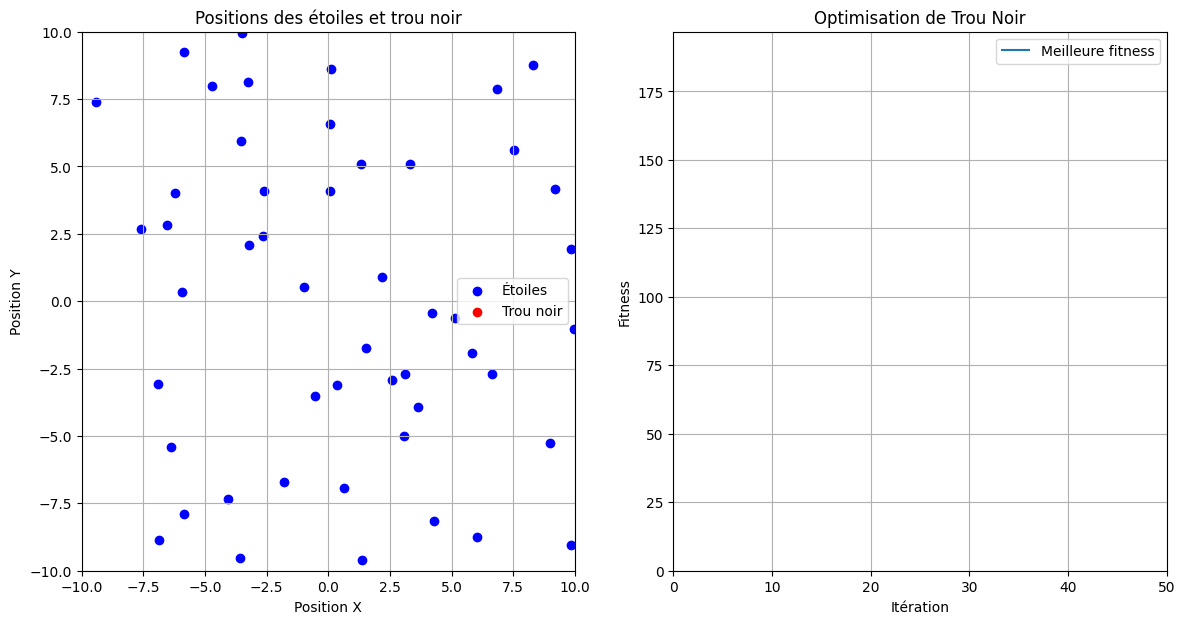

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Button, VBox, Output
import IPython.display as display

# Fonction objectif à minimiser
def objective_function(x):
    return np.sum(x**2)

# Initialisation de la population
def initialize_population(pop_size, dimensions, lower_bound, upper_bound):
    population = np.random.uniform(lower_bound, upper_bound, (pop_size, dimensions))
    return population

# Évaluation de la fitness de la population
def evaluate_fitness(population):
    fitness = np.apply_along_axis(objective_function, 1, population)
    return fitness

# Trouver le trou noir (meilleure solution)
def find_black_hole(population, fitness):
    best_fitness_idx = np.argmin(fitness)
    black_hole = population[best_fitness_idx].copy()
    black_hole_fitness = fitness[best_fitness_idx]
    return black_hole, black_hole_fitness

# Mettre à jour les positions
def update_positions(population, black_hole, lower_bound, upper_bound):
    new_population = population + np.random.rand(population.shape[0], population.shape[1]) * (black_hole - population)
    new_population = np.clip(new_population, lower_bound, upper_bound)
    return new_population

# Calculer l'horizon des événements
def calculate_event_horizon(black_hole_fitness, fitness):
    return black_hole_fitness / np.sum(fitness)

# Vérifier l'horizon des événements
def check_event_horizon(population, black_hole, event_horizon):
    distances = np.linalg.norm(population - black_hole, axis=1)
    in_event_horizon = distances < event_horizon
    return in_event_horizon

# Remplacer les individus dans l'horizon des événements
def replace_in_event_horizon(population, in_event_horizon, lower_bound, upper_bound):
    new_individuals = np.random.uniform(lower_bound, upper_bound, (np.sum(in_event_horizon), population.shape[1]))
    population[in_event_horizon] = new_individuals
    return population

# Paramètres de l'algorithme
pop_size = 50
dimensions = 2
lower_bound = -10
upper_bound = 10
max_iter = 50

# Initialisation de la population et de la fitness
population = initialize_population(pop_size, dimensions, lower_bound, upper_bound)
fitness = evaluate_fitness(population)

# Configuration de la figure pour la visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.set_xlim(lower_bound, upper_bound)
ax1.set_ylim(lower_bound, upper_bound)
ax2.set_xlim(0, max_iter)
ax2.set_ylim(0, np.max(fitness) * 1.1)
ax1.set_xlabel('Position X')
ax1.set_ylabel('Position Y')
ax2.set_xlabel('Itération')
ax2.set_ylabel('Fitness')
ax1.set_title('Positions des étoiles et trou noir')
ax2.set_title('Optimisation de Trou Noir')
ax1.grid(True)
ax2.grid(True)

# Scatter plot pour les positions
stars_scatter = ax1.scatter(population[:, 0], population[:, 1], c='blue', label='Étoiles')
black_hole_scatter = ax1.scatter([], [], c='red', label='Trou noir')
ax2.legend()
ax1.legend()

# Plot pour la fitness
ax_fitness, = ax2.plot([], [], label='Meilleure fitness')
ax2.legend()

output = Output()

# Variables pour stocker les résultats
fitness_results = []
position_results = []
event_horizon_results = []

# Fonction pour exécuter une itération
def run_iteration(b):
    global population, fitness, fitness_results, position_results, event_horizon_results

    black_hole, black_hole_fitness = find_black_hole(population, fitness)
    population = update_positions(population, black_hole, lower_bound, upper_bound)
    fitness = evaluate_fitness(population)
    event_horizon = calculate_event_horizon(black_hole_fitness, fitness)
    in_event_horizon = check_event_horizon(population, black_hole, event_horizon)
    population = replace_in_event_horizon(population, in_event_horizon, lower_bound, upper_bound)
    fitness = evaluate_fitness(population)

    # Mise à jour du scatter plot
    stars_scatter.set_offsets(population)
    black_hole_scatter.set_offsets([black_hole])
    
    # Stocker les résultats
    fitness_results.append(fitness.copy())
    position_results.append(population.copy())
    event_horizon_results.append(event_horizon)

    with output:
        display.clear_output(wait=True)
        display.display(fig)

    # Afficher les résultats dans une table
    fitness_df = pd.DataFrame(fitness_results, columns=[f'Individu {i}' for i in range(pop_size)])
    position_df = pd.DataFrame(position_results[-1], columns=[f'Position {i}' for i in range(dimensions)])
    event_horizon_df = pd.DataFrame(event_horizon_results, columns=['Event Horizon'])

    with output:
        display.clear_output(wait=True)
        display.display(fig)
        display.display(fitness_df)
        display.display(position_df)
        display.display(event_horizon_df)

# Bouton pour aller à l'itération suivante
button = Button(description="Itération suivante")
button.on_click(run_iteration)

# Afficher le bouton et la sortie du graphique
display.display(VBox([button, output]))

# Affichage de la meilleure solution finale
print("Meilleure solution trouvée:", population[np.argmin(fitness)])
print("Meilleure fitness:", np.min(fitness))


<h1 style="text-align:center;font-size:200%;">TSP problem</h1>

/var/folders/f9/l861j34x6435fvkrx5d05bmc0000gn/T/ipykernel_6403/3318266195.py:97: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax2.legend()


Meilleure solution trouvée: [9 0 1 2 4 8 5 7 6 3]
Meilleure fitness: 582.6743216738216


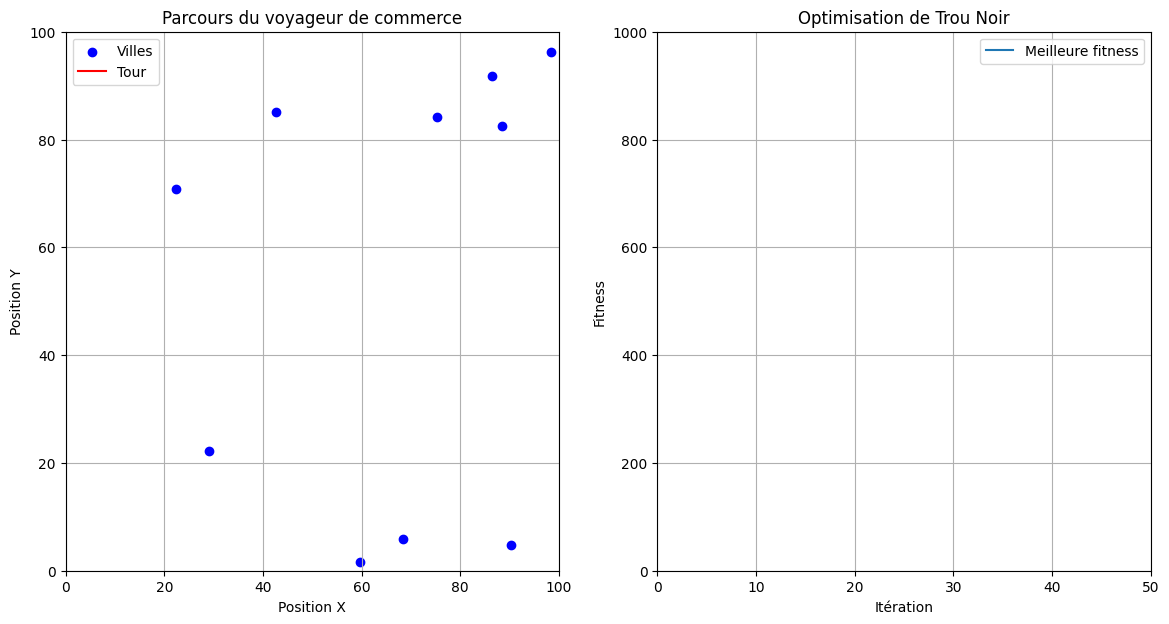

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import Button, VBox, Output
import IPython.display as display

# Génération des coordonnées des villes
def generate_cities(num_cities, lower_bound, upper_bound):
    return np.random.uniform(lower_bound, upper_bound, (num_cities, 2))

# Calcul de la distance totale pour une solution (permutation des villes)
def total_distance(solution, cities):
    distance = 0
    for i in range(len(solution)):
        distance += np.linalg.norm(cities[solution[i]] - cities[solution[i-1]])
    return distance

# Initialisation de la population (permutations aléatoires)
def initialize_population(pop_size, num_cities):
    population = [np.random.permutation(num_cities) for _ in range(pop_size)]
    return np.array(population)

# Évaluation de la fitness de la population
def evaluate_fitness(population, cities):
    fitness = np.array([total_distance(ind, cities) for ind in population])
    return fitness

# Trouver le trou noir (meilleure solution)
def find_black_hole(population, fitness):
    best_fitness_idx = np.argmin(fitness)  # Trouver l'indice de la meilleure fitness
    black_hole = population[best_fitness_idx].copy()  # Copier la meilleure solution
    black_hole_fitness = fitness[best_fitness_idx]  # Obtenir la meilleure fitness
    return black_hole, black_hole_fitness

# Mettre à jour les positions (permutations)
def update_positions(population, black_hole):
    new_population = []
    for individual in population:
        new_individual = individual.copy()
        for i in range(len(individual)):
            if np.random.rand() < 0.5:  # Probabilité de 50% de swap
                idx = np.where(individual == black_hole[i])[0][0]
                new_individual[i], new_individual[idx] = new_individual[idx], new_individual[i]
        new_population.append(new_individual)
    return np.array(new_population)

# Calculer l'horizon des événements
def calculate_event_horizon(black_hole_fitness, fitness):
    return black_hole_fitness / np.sum(fitness)

# Vérifier l'horizon des événements
def check_event_horizon(population, black_hole, event_horizon, cities):
    distances = np.array([total_distance(ind, cities) for ind in population])
    in_event_horizon = distances < event_horizon
    return in_event_horizon

# Remplacer les individus dans l'horizon des événements
def replace_in_event_horizon(population, in_event_horizon, num_cities):
    for i in range(len(population)):
        if in_event_horizon[i]:
            population[i] = np.random.permutation(num_cities)
    return population

# Paramètres de l'algorithme
pop_size = 5  # Taille de la population
num_cities = 10  # Nombre de villes
lower_bound = 0  # Limite inférieure des coordonnées des villes
upper_bound = 100  # Limite supérieure des coordonnées des villes
max_iter = 50  # Nombre maximal d'itérations

# Génération des villes et initialisation de la population
cities = generate_cities(num_cities, lower_bound, upper_bound)
population = initialize_population(pop_size, num_cities)
fitness = evaluate_fitness(population, cities)

# Variables pour suivre la meilleure fitness à chaque itération
best_fitness_values = []

# Configuration de la figure pour la visualisation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))
ax1.set_xlim(lower_bound, upper_bound)
ax1.set_ylim(lower_bound, upper_bound)
ax2.set_xlim(0, max_iter)
ax2.set_ylim(0, max(np.max(fitness), 1000))
ax1.set_xlabel('Position X')
ax1.set_ylabel('Position Y')
ax2.set_xlabel('Itération')
ax2.set_ylabel('Fitness')
ax1.set_title('Parcours du voyageur de commerce')
ax2.set_title('Optimisation de Trou Noir')
ax1.grid(True)
ax2.grid(True)

# Scatter plot for cities
cities_scatter = ax1.scatter(cities[:, 0], cities[:, 1], c='blue', label='Villes')
tour_lines, = ax1.plot([], [], 'r-', label='Tour')
ax2.legend()
ax1.legend()

# Plot for fitness
ax_fitness, = ax2.plot([], [], label='Meilleure fitness')
ax2.legend()

output = Output()

# Variables pour stocker les résultats
fitness_results = []
position_results = []
event_horizon_results = []

# Fonction pour exécuter une itération
def run_iteration(b):
    global population, fitness, best_fitness_values, fitness_results, position_results, event_horizon_results

    black_hole, black_hole_fitness = find_black_hole(population, fitness)  # Trouver le trou noir
    population = update_positions(population, black_hole)  # Mettre à jour les positions
    fitness = evaluate_fitness(population, cities)  # Réévaluer la fitness
    event_horizon = calculate_event_horizon(black_hole_fitness, fitness)  # Calculer l'horizon des événements
    in_event_horizon = check_event_horizon(population, black_hole, event_horizon, cities)  # Vérifier les individus dans l'horizon des événements
    population = replace_in_event_horizon(population, in_event_horizon, num_cities)  # Remplacer les individus dans l'horizon des événements
    fitness = evaluate_fitness(population, cities)  # Réévaluer la fitness

    best_fitness_values.append(black_hole_fitness)  # Ajouter la meilleure fitness actuelle à la liste
    ax_fitness.set_data(range(len(best_fitness_values)), best_fitness_values)  # Mettre à jour les données du graphique de fitness
    ax2.relim()
    ax2.autoscale_view()

    # Mettre à jour le tracé du tour
    best_tour = np.append(black_hole, black_hole[0])  # Ajouter la première ville à la fin pour boucler le tour
    tour_lines.set_data(cities[best_tour, 0], cities[best_tour, 1])

    # Stocker les résultats
    fitness_results.append(fitness.tolist())
    position_results.append(population.tolist())
    event_horizon_results.append(event_horizon)

    with output:
        display.clear_output(wait=True)
        display.display(fig)

    # Afficher les résultats dans une table
    fitness_df = pd.DataFrame(fitness_results, columns=[f'Individu {i}' for i in range(pop_size)])
    position_df = pd.DataFrame(position_results, columns=[f'Position {i}' for i in range(pop_size)])
    event_horizon_df = pd.DataFrame(event_horizon_results, columns=['Event Horizon'])

    with output:
        display.display(fitness_df)
        display.display(position_df)
        display.display(event_horizon_df)

# Bouton pour aller à l'itération suivante
button = Button(description="Itération suivante")
button.on_click(run_iteration)

# Afficher le bouton et la sortie du graphique
display.display(VBox([button, output]))

# Affichage de la meilleure solution finale
print("Meilleure solution trouvée:", population[np.argmin(fitness)])
print("Meilleure fitness:", np.min(fitness))
